In [158]:
import math
import random
from display_graph import draw_dot

In [159]:
class Value:
    def __init__(self, scalar, _children=(), _op="", label=""):
        self.label = label
        self.scalar = scalar
        self._prev = _children
        self._op = _op
        self.grad = 0

    # nicer output
    def __repr__(self):
        return f"Value(scalar={self.scalar})"

    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(scalar=other)
        out = Value(self.scalar + other.scalar, (self, other), "+")
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(scalar=other)
        out = Value(self.scalar * other.scalar, (self, other), "*")
        return out
    

    def __pow__(self, other):
        assert isinstance(other, (int, float))
        return Value(self.scalar ** other, (self,), f"**{other}")
    

    def __sub__(self, other):
        return self + (-other)
    
    def __truediv__(self, other):
        return self * (other ** -1)
    
    def __rtruediv__(self, other):
        return other * (self ** -1)

    def __neg__(self):
        return -1 * self
    

    def __radd__(self, other):
        return self + other
    

    def __rmul__(self, other):
        return self * other
    

    def __rsub__(self, other):
        return other + (-self)
    
    

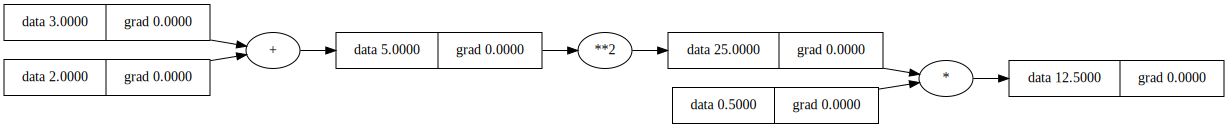

In [160]:
a = Value(2, label="a")
b = Value(3, label="b")

c = a + b
d = c ** 2
e = d / 2
draw_dot(e)